In [1]:
!python --version
#Python 3.8.16
# Install new python version
# Let's first install and upgrade to Python 3.9:



Python 3.10.12


# CH01 LangChain 시작하기

LangChain 은 언어 모델을 활용해 다양한 애플리케이션을 개발할 수 있는 프레임워크를 말합니다. 이 프레임워크를 통해 언어 모델은 다음과 같은 기능을 수행할 수 있게 됩니다.

* 문맥을 인식하는 기능: LangChain은 언어 모델을 다양한 문맥 소스와 연결합니다. 여기에는 프롬프트 지시사항, 소수의 예시, 응답에 근거한 내용 등이 포함됩니다. 이를 통해 언어 모델은 제공된 정보를 기반으로 더 정확하고 관련성 높은 답변을 생성할 수 있습니다.
* 추론하는 기능: 또한, 언어 모델은 주어진 문맥을 바탕으로 어떠한 답변을 제공하거나, 어떤 조치를 취해야 할지를 스스로 추론할 수 있습니다. 이는 언어 모델이 단순히 정보를 재생산하는 것을 넘어서, 주어진 상황을 분석하고 적절한 해결책을 제시할 수 있음을 의미합니다.

LangChain 을 활용하면 이전에 언급한 기능을 바탕으로 검색 증강 생성(RAG) 어플리케이션 제작, 구조화된 데이터 분석, 챗봇 등을 만들 수 있습니다.

## 설치

권장하는 파이썬 버전은 3.11 버전입니다.

In [1]:
pip install uv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 11.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
!uv

An extremely fast Python package manager.

Usage: uv [OPTIONS] <COMMAND>

Commands:
  run      Run a command or script
  init     Create a new project
  add      Add dependencies to the project
  remove   Remove dependencies from the project
  sync     Update the project's environment
  lock     Update the project's lockfile
  export   Export the project's lockfile to an alternate format
  tree     Display the project's dependency tree
  tool     Run and install commands provided by Python packages
  python   Manage Python versions and installations
  pip      Manage Python packages with a pip-compatible interface
  venv     Create a virtual environment
  build    Build Python packages into source distributions and wheels
  publish  Upload distributions to an index
  cache    Manage uv's cache
  self     Manage the uv executable
  version  Display uv's version
  help     Display documentation for a command

Cache options:
  -n, --no-cache               Avoid reading from or writing to 

In [3]:
!uv python install -r https://raw.githubusercontent.com/teddylee777/langchain-kr/main/requirements-mini.txt


error: Cannot download managed Python for request: path `https://raw.githubusercontent.com/teddylee777/langchain-kr/main/requirements-mini.txt`


In [4]:
!python -m pip install -r https://raw.githubusercontent.com/teddylee777/langchain-kr/main/requirements.txt


Ignoring async-timeout: markers 'python_version >= "3.11" and python_full_version < "3.11.3"' don't match your environment
Ignoring colorama: markers 'python_version >= "3.11" and python_version < "3.12" and (platform_system == "Windows" or os_name == "nt" or sys_platform == "win32")' don't match your environment
Ignoring nvidia-cublas-cu12: markers 'platform_system == "Linux" and platform_machine == "x86_64" and python_version >= "3.11" and python_version < "3.12"' don't match your environment
Ignoring nvidia-cuda-cupti-cu12: markers 'platform_system == "Linux" and platform_machine == "x86_64" and python_version >= "3.11" and python_version < "3.12"' don't match your environment
Ignoring nvidia-cuda-nvrtc-cu12: markers 'platform_system == "Linux" and platform_machine == "x86_64" and python_version >= "3.11" and python_version < "3.12"' don't match your environment
Ignoring nvidia-cuda-runtime-cu12: markers 'platform_system == "Linux" and platform_machine == "x86_64" and python_version

## 구성

이 프레임워크는 여러 부분으로 구성되어 있습니다.

LangChain 라이브러리: Python 및 JavaScript 라이브러리. 다양한 컴포넌트의 인터페이스와 통합, 이러한 컴포넌트를 체인과 에이전트로 결합하는 기본 런타임, 그리고 즉시 사용 가능한 체인과 에이전트의 구현을 포함합니다.
LangChain 템플릿: 다양한 작업을 위한 쉽게 배포할 수 있는 참조 아키텍처 모음입니다.
LangServe: LangChain 체인을 REST API로 배포하기 위한 라이브러리입니다.
LangSmith: 어떤 LLM 프레임워크에도 구축된 체인을 디버그, 테스트, 평가, 모니터링할 수 있게 해주며 LangChain과 원활하게 통합되는 개발자 플랫폼입니다.
LangGraph: LLM을 사용한 상태유지가 가능한 다중 액터 애플리케이션을 구축하기 위한 라이브러리로, LangChain 위에 구축되었으며 LangChain과 함께 사용하도록 설계되었습니다. 여러 계산 단계에서 다중 체인(또는 액터)을 순환 방식으로 조정할 수 있는 능력을 LangChain 표현 언어에 추가합니다.

## 개발 용이성✨
컴포넌트의 조립 및 통합 🔧

* LangChain은 언어 모델과의 작업을 위한 조립 가능한 도구 및 통합을 제공합니다.
* 컴포넌트는 모듈식으로 설계되어, 사용하기 쉽습니다. 이는 개발자가 LangChain 프레임워크를 자유롭게 활용할 수 있게 해줍니다.

즉시 사용 가능한 체인 🚀

* 고수준 작업을 수행하기 위한 컴포넌트의 내장 조합을 제공합니다.
* 이러한 체인은 개발 과정을 간소화하고 속도를 높여줍니다.

## 주요 모듈 📌
### 모델 I/O 📃
* 프롬프트 관리, 최적화 및 LLM과의 일반적인 인터페이스와 작업을 위한 유틸리티를 포함합니다.

### 검색 📚
* '데이터 강화 생성'에 초점을 맞춘 이 모듈은 생성 단계에서 필요한 데이터를 외부 데이터 소스에서 가져오는 작업을 담당합니다.

### 에이전트 🤖
* 언어 모델이 어떤 조치를 취할지 결정하고, 해당 조치를 실행하며, 관찰하고, 필요한 경우 반복하는 과정을 포함합니다.

LangChain을 활용하면, 언어 모델 기반 애플리케이션의 개발을 보다 쉽게 시작할 수 있으며, 필요에 맞게 기능을 맞춤 설정하고, 다양한 데이터 소스와 통합하여 복잡한 작업을 처리할 수 있게 됩니다.


# 03. LangSmith 추적 설정

## LangSmith 추적 설정하기
---
LangSmith는 LLM 애플리케이션 개발, 모니터링 및 테스트 를 위한 플랫폼입니다. 프로젝트나 LangChain 학습을 시작하시는 분들이라면 LangSmith는 꼭 설정 후 진행하는 것을 추천 드립니다.

## LangSmith 의 추적기능
---
추적은 LLM 애플리케이션의 동작을 이해하기 위한 강력한 도구입니다. LangSmith는 LangChain 사용 여부와 관계없이 동급 최고의 추적 기능을 제공합니다.

추적은 다음과 같은 문제를 추적하는 데 도움이 될 수 있습니다.

* 예상치 못한 최종 결과
* 에이전트가 루핑되는 이유
* 체인이 예상보다 느린 이유
* 에이전트가 각 단계에서 사용한 토큰 수

### 프로젝트 단위 추적
프로젝트 단위로 실행 카운트, Error 발생률, 토큰 사용량, 과금 정보등을 확인할 수 있습니다.

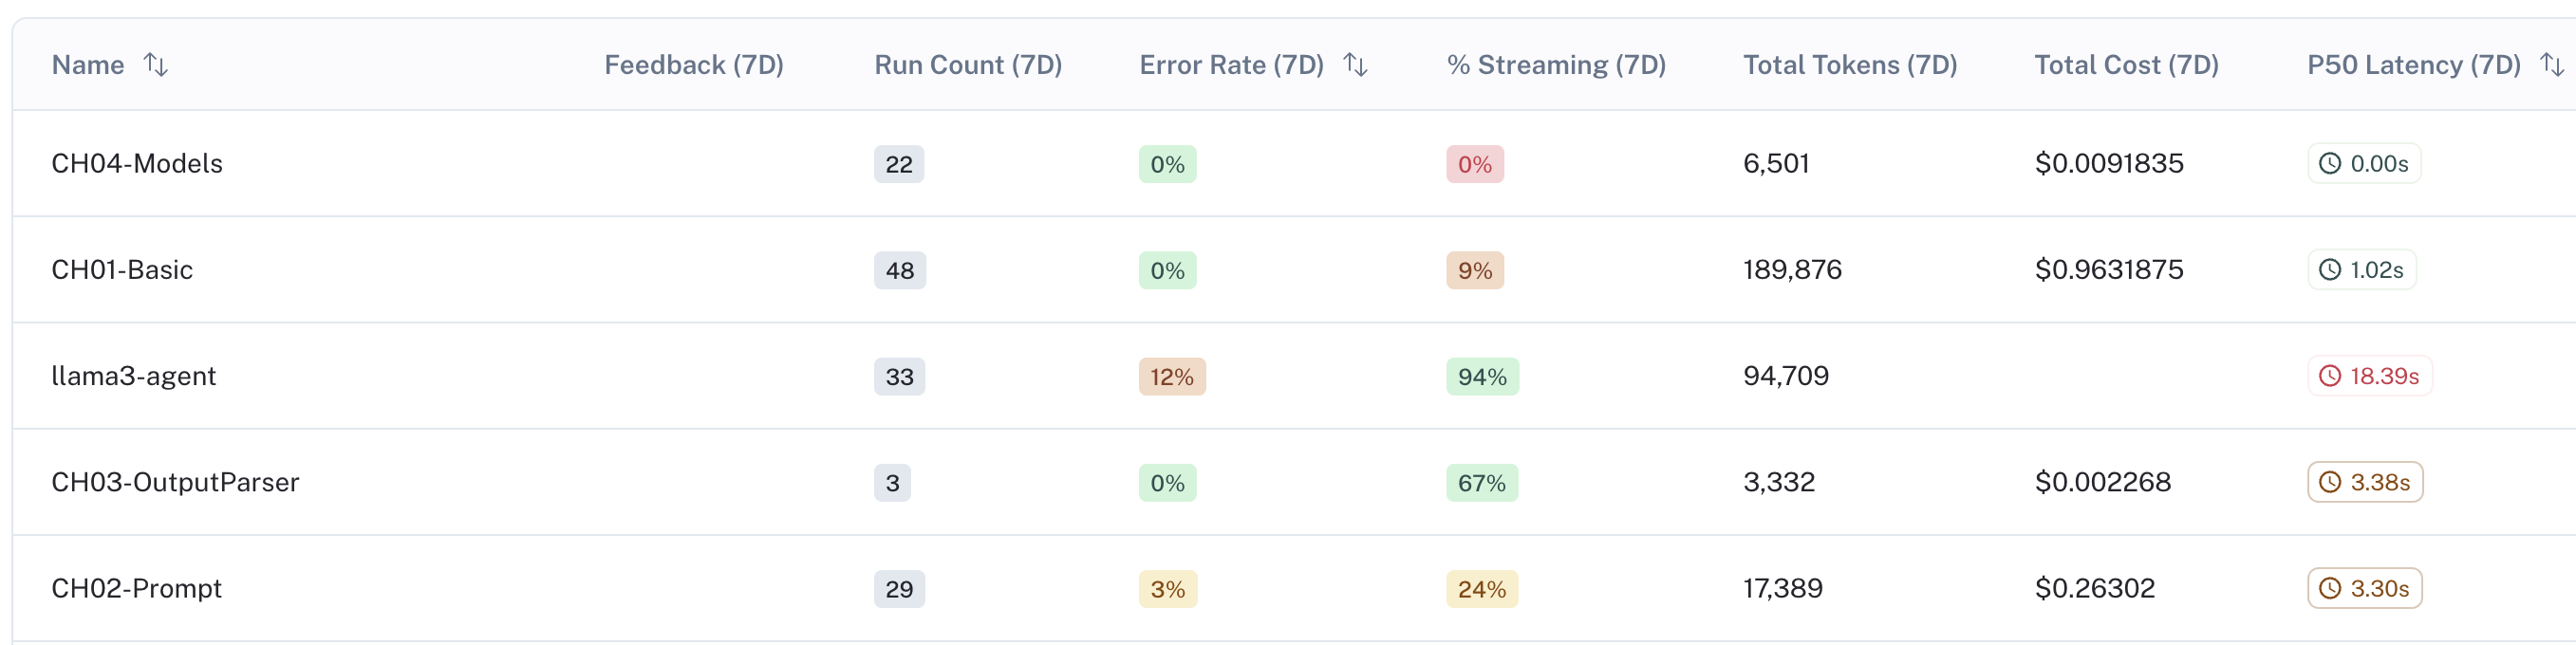


프로젝트를 클릭하면 실행된 모든 Run 이 나타납니다.

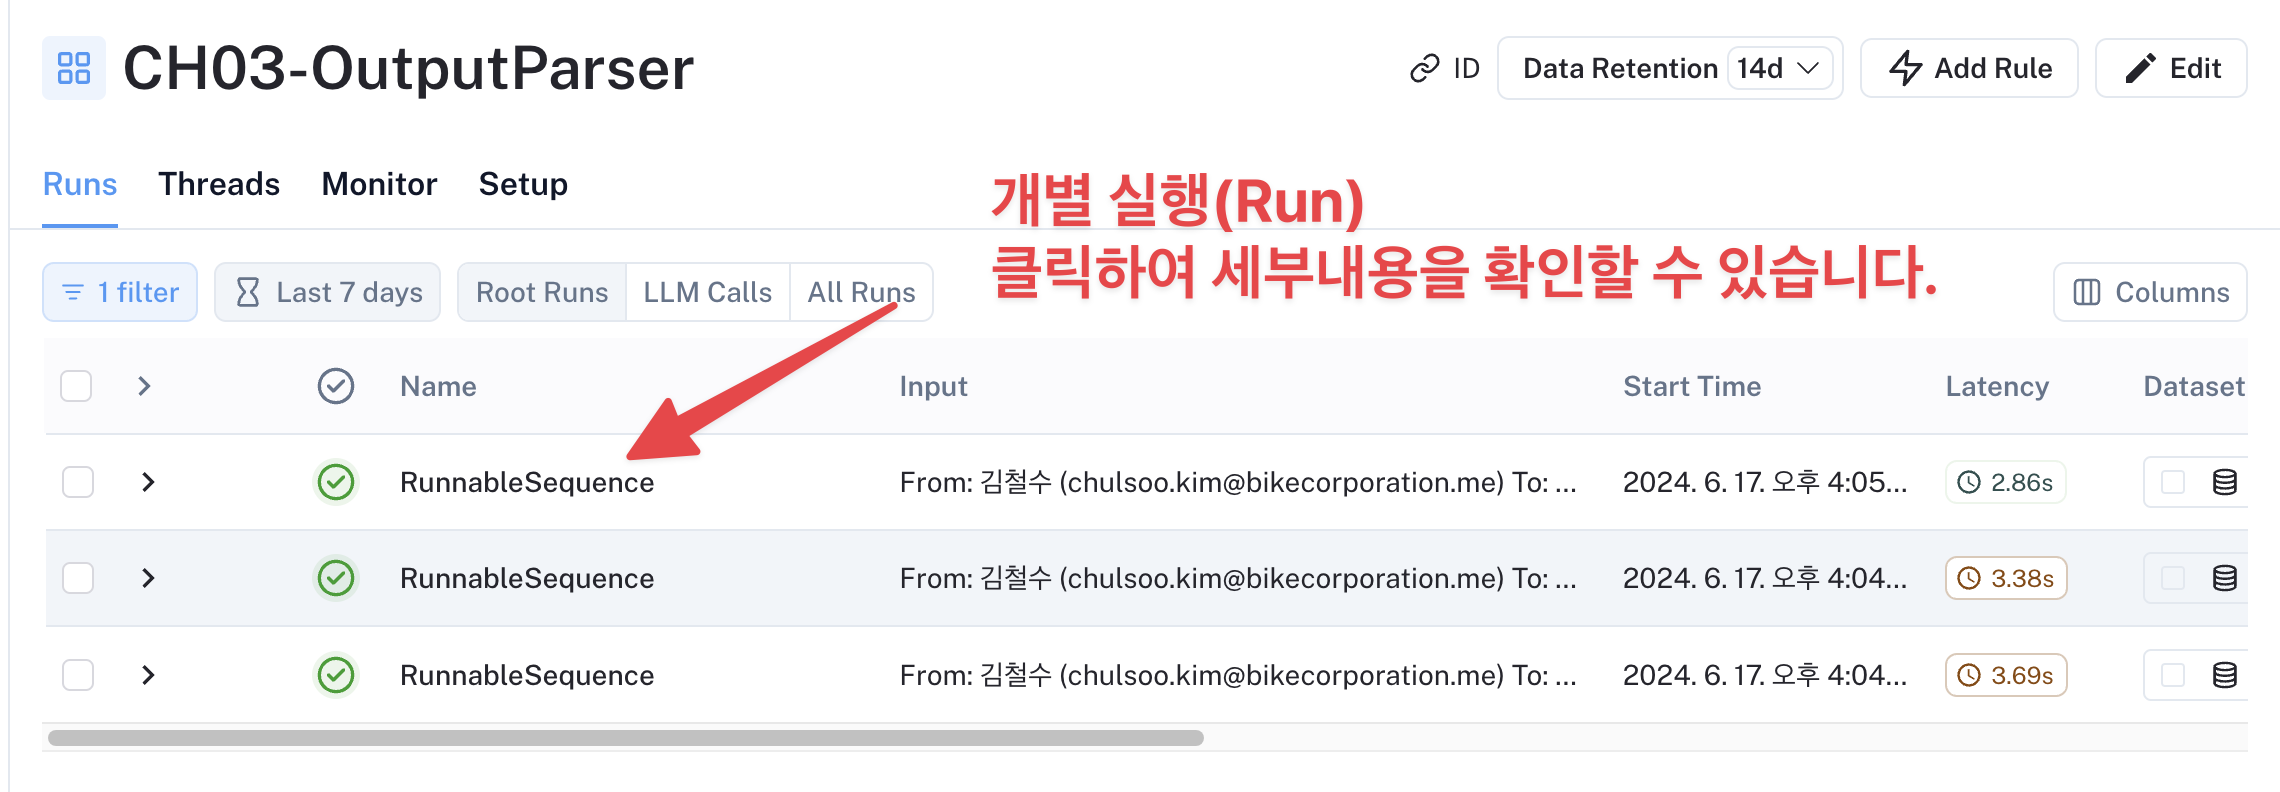

1개의 실행에 대한 세부 단계별 추척

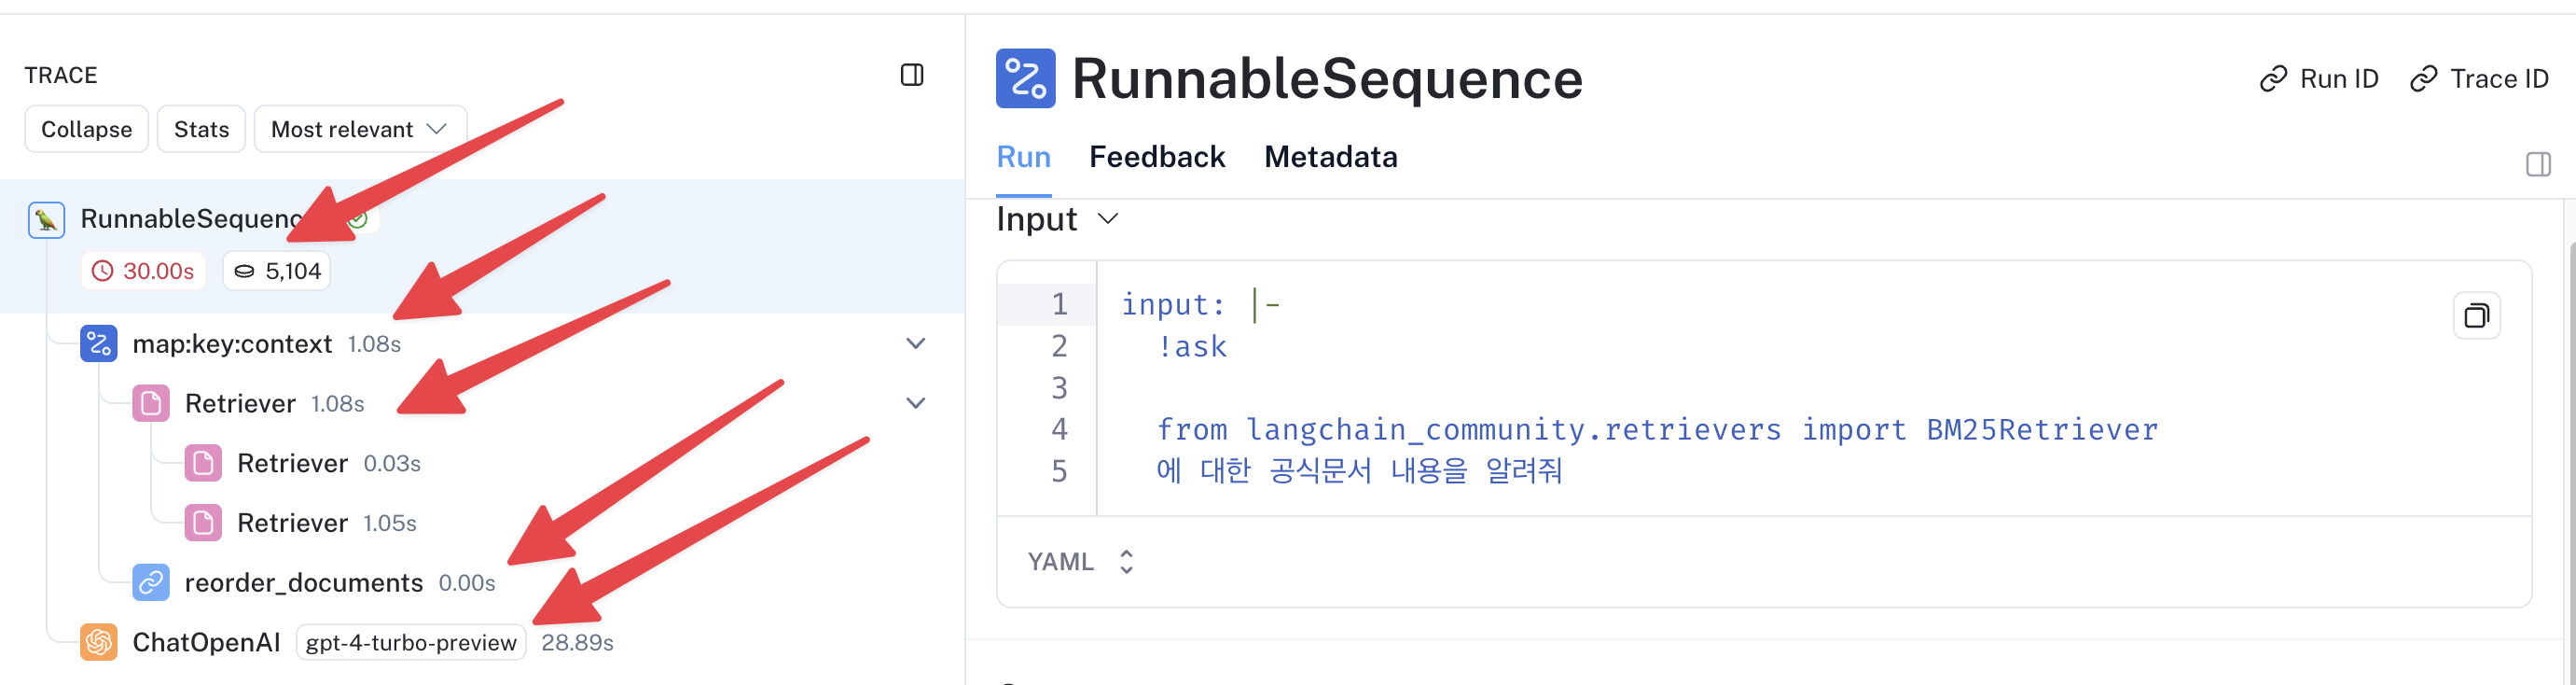

1개의 실행을 한 뒤 retrieve 된 문서의 검색 결과 뿐만 아니라, GPT 의 입출력 내용에 대해서 자세하게 기록합니다. 따라서, 문서의 검색된 내용을 확인 후 검색 알고리즘을 변경해야할지 혹은 프롬프트를 변경해야할지 판단하는데 도움이 됩니다.

뿐만 아니라, 상단에는 1개의 실행(Run) 이 걸린 시간(약 30초)와 사용된 토큰(5,104) 등이 표기가 되고, 토큰에 마우스 호버를 하게 되면 청구 금액까지 표기해 줍니다.

## LangSmith 추적 사용하기
---
추적을 사용하는 방법은 매우 간단합니다.

#### LangSmith API Key 발급
1. https://smith.langchain.com/ 으로 접속하여 회원가입을 진행합니다.
1. 가입후 이메일 인증하는 절차를 진행해야 합니다.
1. 왼쪽 톱니바퀴(Setting) - 가운데 "Personal" - "Create API Key" 를 눌러 API 키를 발급 받습니다.

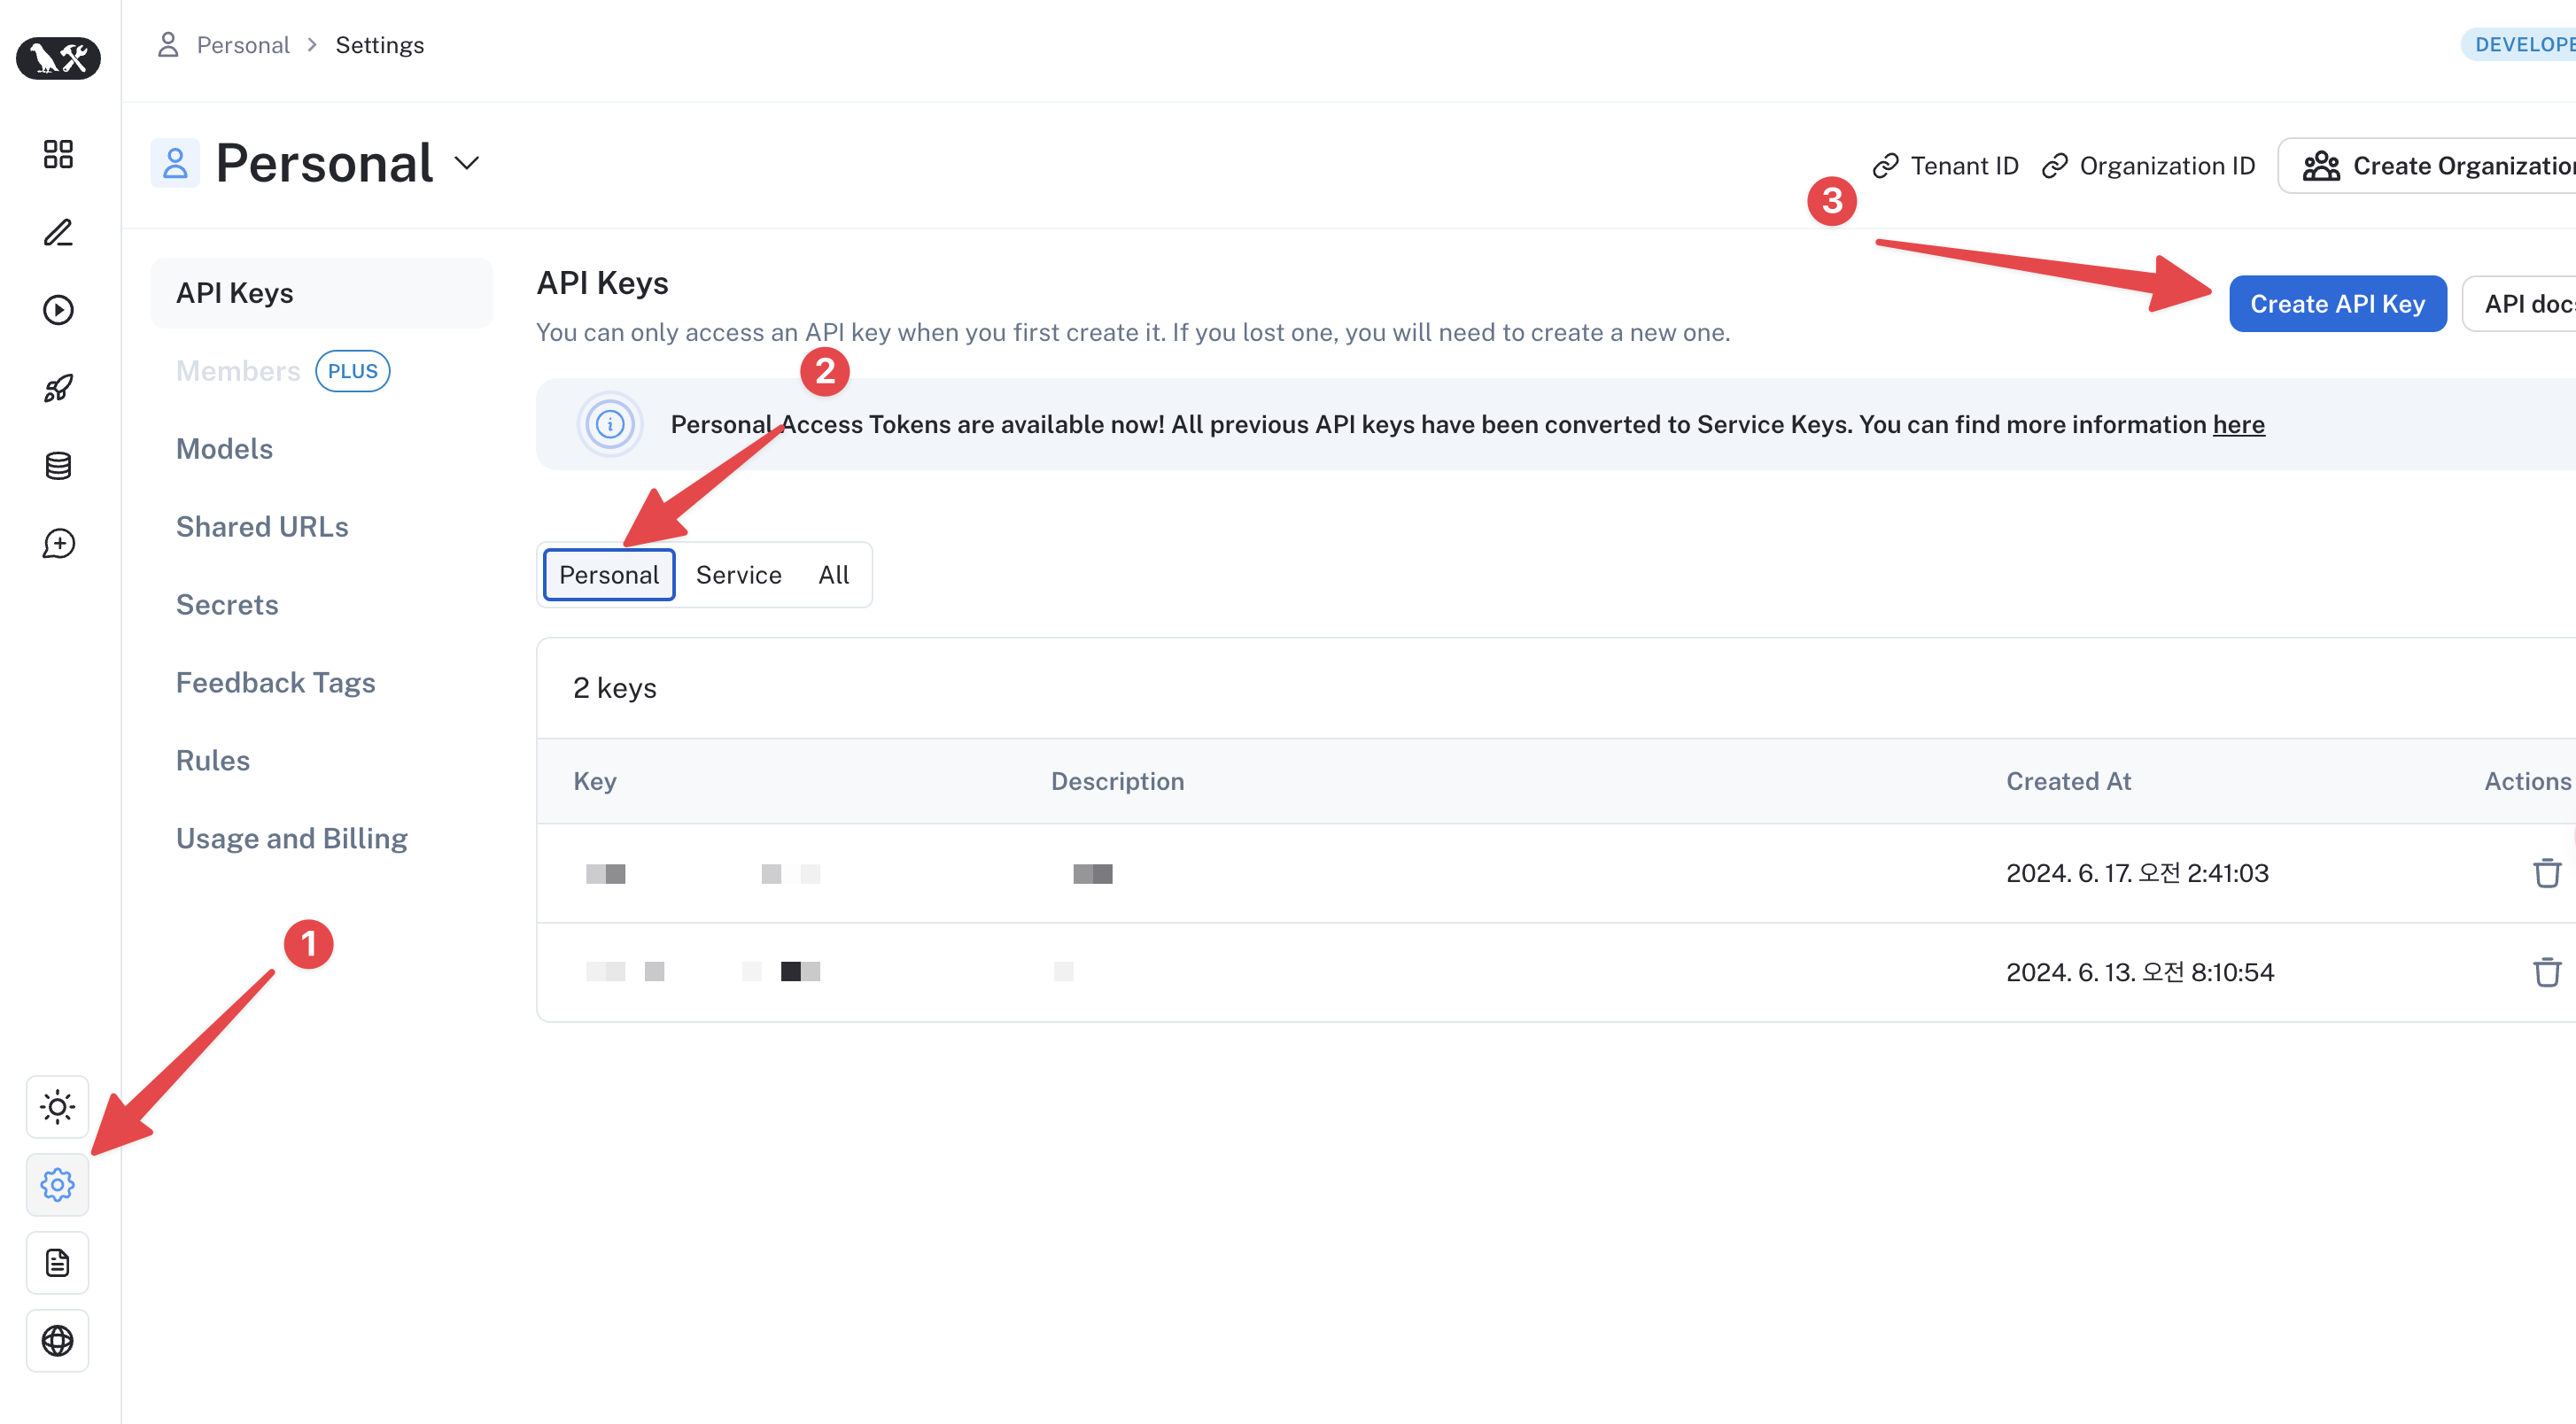

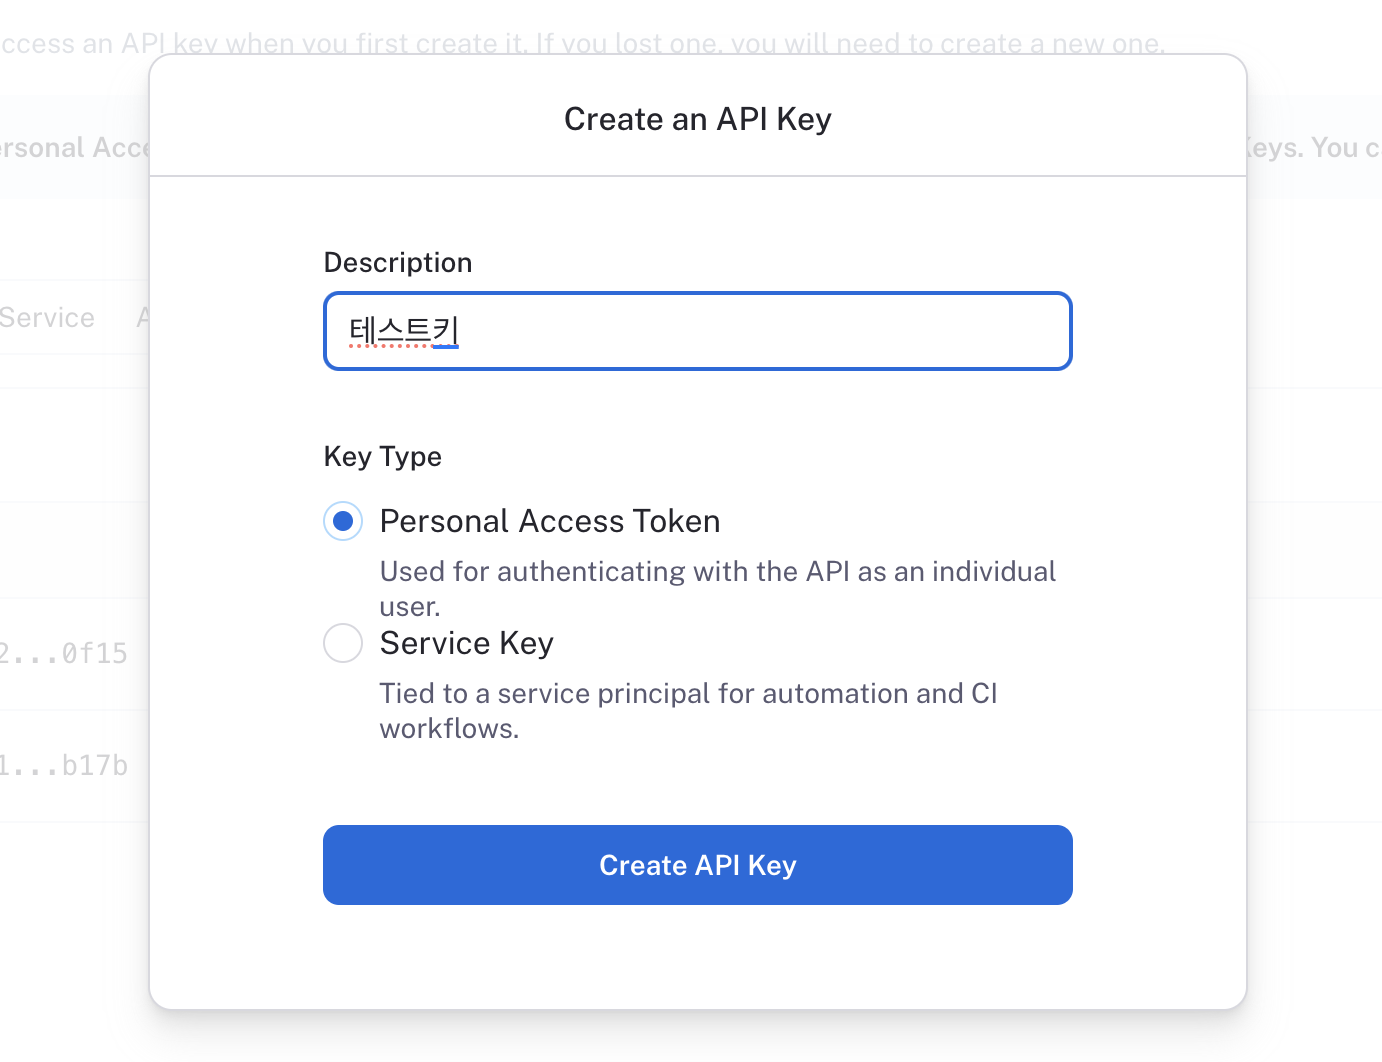

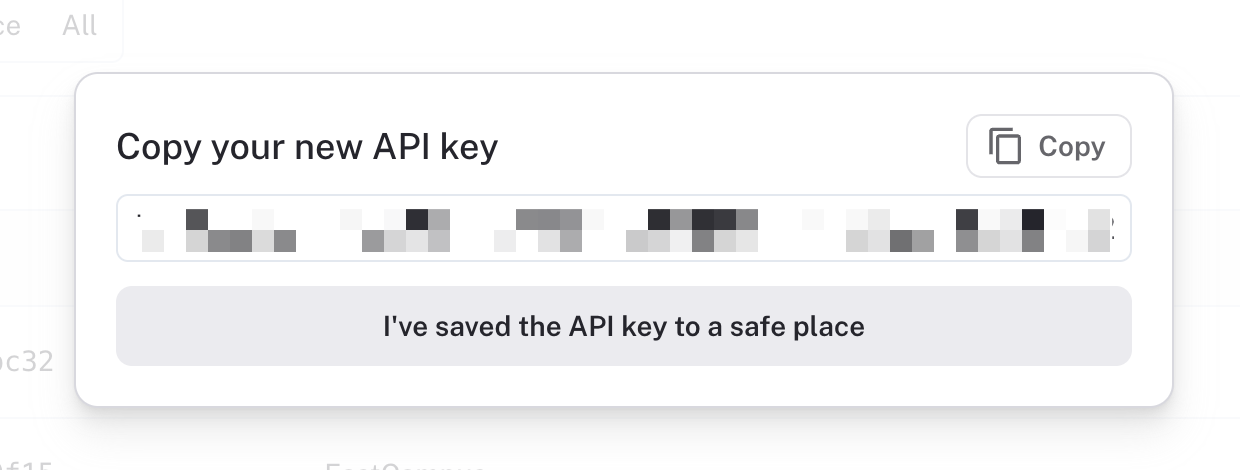

### .env 에 LangSmith 키 설정
먼저, .env 파일에 LangSmith 에서 발급받은 키와 프로젝트 정보를 입력합니다.

* LANGCHAIN_TRACING_V2: "true" 로 설정하면 추적을 시작합니다.
* LANGCHAIN_ENDPOINT: https://api.smith.langchain.com 변경하지 않습니다.
* LANGCHAIN_API_KEY: 이전 단계에서 발급받은 키 를 입력합니다.
* LANGCHAIN_PROJECT: 프로젝트 명 을 기입하면 해당 프로젝트 그룹으로 모든 실행(Run) 이 추적됩니다.

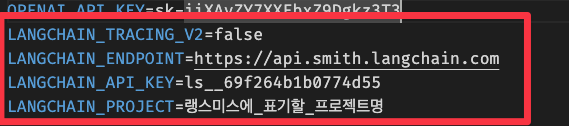

## Jupyter Notebook 혹은 코드에서 추적을 활성화 하기
---
추적을 활성화 하는 방법은 매우 간단합니다. 환경 변수만 설정하면 됩니다.

.env 에 설정한 내용을 불러옵니다.



In [11]:
from dotenv import load_dotenv

load_dotenv()



False

만약 설정한 추적이 활성화 되어 있고, API KEY 와 프로젝트 명이 제대로 설정되어 있다면, 이걸로도 충분합니다.

하지만, 프로젝트 명을 변경하거나, 추적을 변경하고 싶을 때는 아래의 코드로 변경할 수 있습니다.

In [7]:
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = "LangChain 프로젝트명"
os.environ["LANGCHAIN_API_KEY"] = ""
os.environ["OPEN_API_KEY"] = ""


## langchain-teddynote
---
langchain 관련 기능을 보다 더 편리하게 사용하기 위한 목적으로 langchain-teddynote 패키지를 만들었습니다.

### 설치방법
설치코드 (터미널에서 실행 혹은 Jupyter Notebook 에서 실행)

In [8]:
pip install langchain-teddynote

  Using cached rank_bm25-0.2.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached pinecone_text-0.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached pdf2image-1.17.0-py3-none-any.whl.metadata (6.2 kB)
  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 110.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 115.1 

### LangSmith 추적 설정
.env 파일에 LangSmith API 키가 설정 되어 있어야 합니다.(LANGCHAIN_API_KEY)




In [10]:
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("원하는 프로젝트명")

ModuleNotFoundError: No module named 'langchain_teddynote'


출력예시
```
LangSmith 추적을 시작합니다.
[프로젝트명]
랭체인 튜토리얼 프로젝트
```

추척을 원하지 않을 때는 다음과 같이 추적을 끌 수 있습니다.
```
from langchain_teddynote import logging

# set_enable=False 로 지정하면 추적을 하지 않습니다.
logging.langsmith("랭체인 튜토리얼 프로젝트", set_enable=False)
```

# 04. OpenAI API 사용(GPT-4o 멀티모달)

In [ ]:
!python --version

In [13]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()


False

In [14]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# .env 파일에 LANGCHAIN_API_KEY를 입력합니다.
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH01-Basic")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH01-Basic


In [19]:

import os

print(f"[API KEY]\n{os.environ['OPENAI_API_KEY']}")

KeyError: 'OPENAI_API_KEY'

In [17]:
from langchain_openai import ChatOpenAI

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
print(f"[답변]: {llm.invoke(question)}")

ModuleNotFoundError: No module named 'langchain_openai'

# 05. LangChain Expression Language(LCEL)

## 기본 예시: 프롬프트 + 모델 + 출력 파서
---
가장 기본적이고 일반적인 사용 사례는 prompt 템플릿과 모델을 함께 연결하는 것입니다. 이것이 어떻게 작동하는지 보기 위해, 각 나라별 수도를 물어보는 Chain을 생성해 보겠습니다.

In [6]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()


ModuleNotFoundError: No module named 'dotenv'

In [ ]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH01-Basic")


## 프롬프트 템플릿의 활용
---
PromptTemplate

* 사용자의 입력 변수를 사용하여 완전한 프롬프트 문자열을 만드는 데 사용되는 템플릿입니다
* 사용법
* template: 템플릿 문자열입니다. 이 문자열 내에서 중괄호 {}는 변수를 나타냅니다.
* input_variables: 중괄호 안에 들어갈 변수의 이름을 리스트로 정의합니다.

input_variables
* input_variables는 PromptTemplate에서 사용되는 변수의 이름을 정의하는 리스트입니다.

In [ ]:
from langchain_teddynote.messages import stream_response  # 스트리밍 출력
from langchain_core.prompts import PromptTemplate


from_template() 메소드를 사용하여 PromptTemplate 객체 생성

In [ ]:
# template 정의
template = "{country}의 수도는 어디인가요?"

# from_template 메소드를 이용하여 PromptTemplate 객체 생성
prompt_template = PromptTemplate.from_template(template)
prompt_template
